In [16]:
from __future__ import print_function, division, absolute_import
import os
import sys
sys.path.insert(0, "C:\\Users\\Matt\\Desktop\\orbithunter\\")
from orbithunter import *
import numpy as np
import matplotlib.pyplot as plt
import time

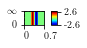

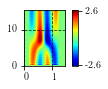

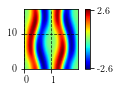

In [18]:
td = tile_dictionary_ks(padded=True, comoving=False)
td[0].plot()
td[1].plot()
td[2].plot()

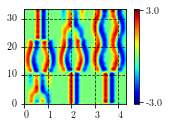

In [22]:
from orbithunter.gluing import tile_dictionary_ks

# ?tile_dictionary_ks

td = tile_dictionary_ks(padded=True, comoving=False)

symbol_array = np.array([[0, 1, 2], [2, 2, 2], [1, 0, 0]])
tiled_orbit = rediscretize(tile(symbol_array, td, OrbitKS, stripwise=True))
tiled_orbit.plot()

In [23]:
symbol_array

array([[0, 1, 2],
       [2, 2, 2],
       [1, 0, 0]])

In [ ]:
np.random.seed(0)
symbol_array = (3*np.random.rand(10,10)).astype(int)
t0 = time.time()
tiled_orbit = rediscretize(tile(symbol_array, td, OrbitKS, stripwise=True, gluing_order=(1,0)))
tiled_orbit.plot()

In [9]:
orbit0 = read_h5('OrbitKS_L31p245_T46p754.h5')
orbit1 = read_h5('OrbitKS_L26p931_T41p266.h5')
orbit2 = read_h5('OrbitKS_L37p297_T79p778.h5')
orbit3 = read_h5('OrbitKS_L27p038_T23p329.h5')

In [10]:
tile_dict = {0: orbit0, 1: orbit1, 2: orbit2, 3: orbit3}

In [12]:
tile_dict = rediscretize_tiling_dictionary(tile_dict, new_shape=(16,16))

In [21]:
np.random.seed(0)
symbol_array = (4*np.random.rand(5,5)).astype(int)
symbol_array

array([[2, 2, 2, 2, 1],
       [2, 1, 3, 3, 1],
       [3, 2, 2, 3, 0],
       [0, 0, 3, 3, 3],
       [3, 3, 1, 3, 0]])

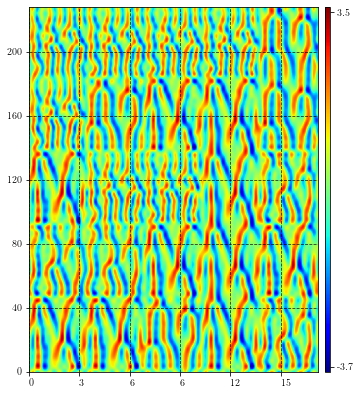

In [14]:
tile(symbol_array, tile_dict, OrbitKS).plot()

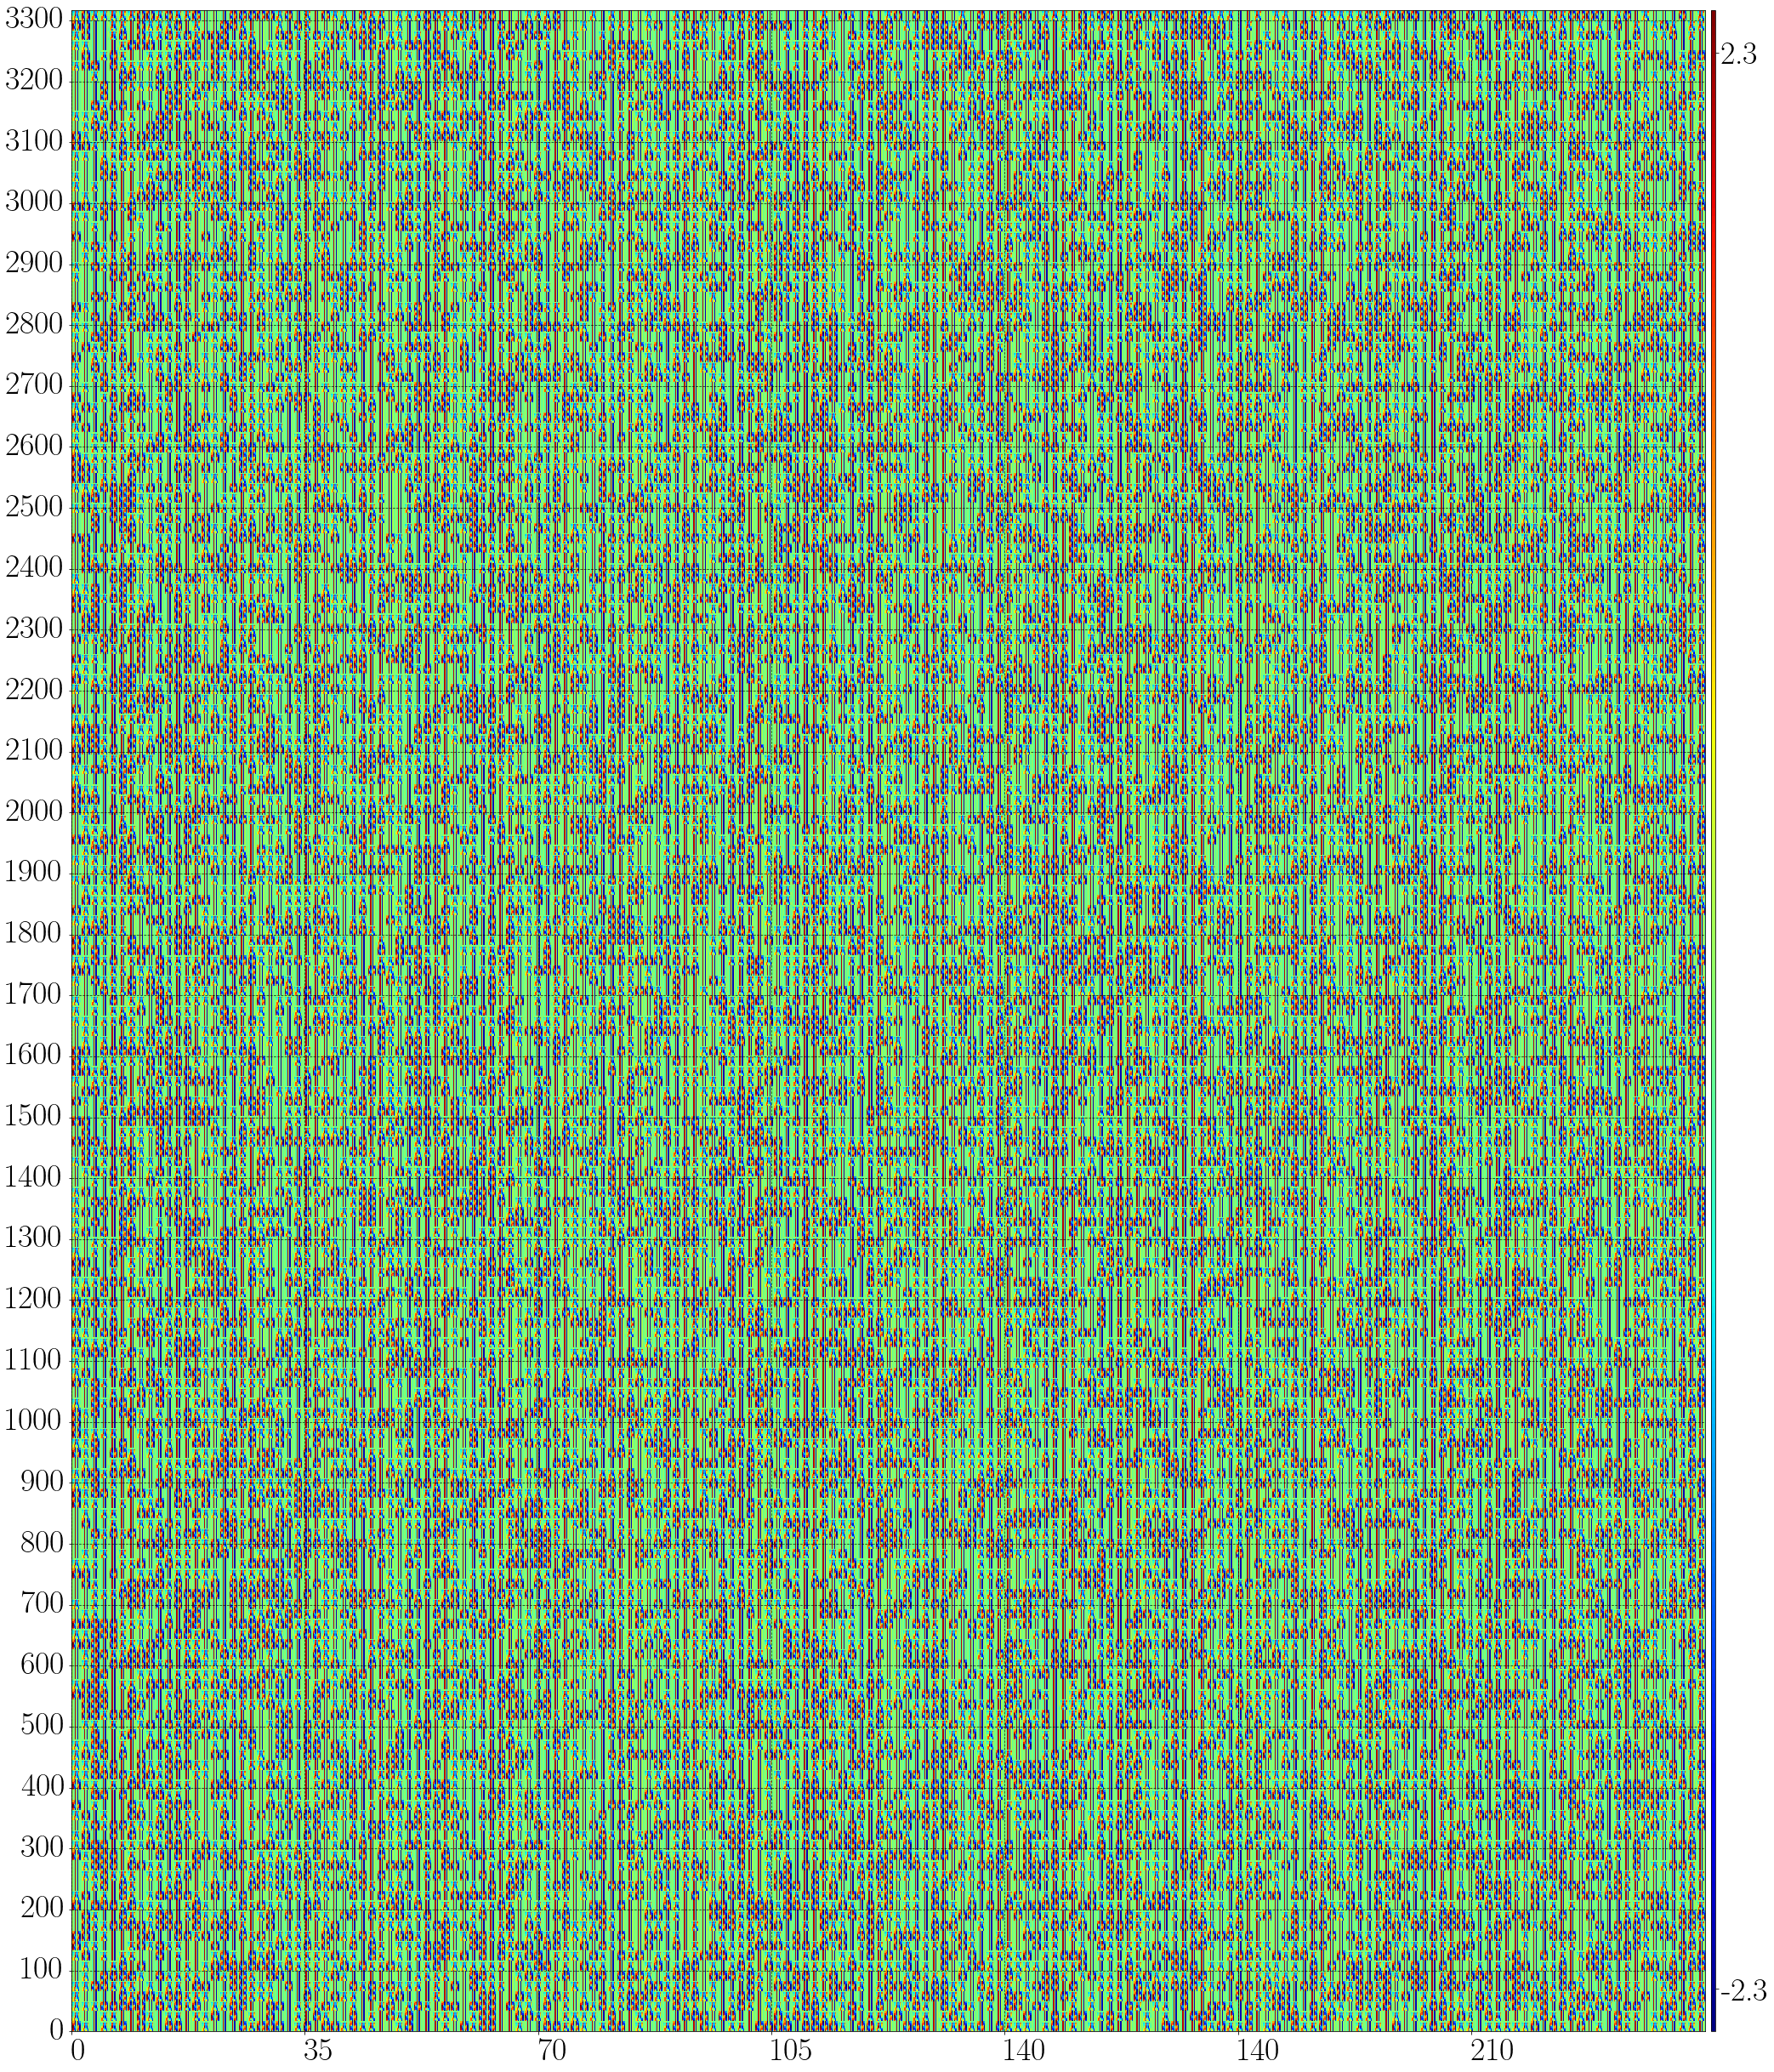

In [20]:
td = tile_dictionary_ks(padded=True, comoving=False)
td = rediscretize_tiling_dictionary(td, new_shape=(8,8))
np.random.seed(0)
symbol_array = (3*np.random.rand(201,177)).astype(int)
tiled_orbit = tile(symbol_array, td, OrbitKS)
tiled_orbit.plot()